# 3 - Hopfield Network

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

class HopfieldNetwork:
    def __init__(self):
        self.weights = 0
        self.pattern = 0
        self.targets = 0

    def sign(self, data):
        return np.where(data >= 0, 1, -1)

    def transfer(self, data):
        output = np.dot(self.weights, data)
        return self.sign(output)

    def outer_product(self, one, two):
        self.weights = np.outer(one, two)
        return np.outer(one, two)

    def learn_weights(self, targets):
        #self.pattern = data
        self.targets = targets
        #self.weights = np.dot(self.targets, np.transpose(self.targets))
        self.weights = np.dot(targets.transpose(), targets)

    def set_pattern(self, pattern):
        self.pattern = pattern.copy()

    def update_rule(self):
        self.pattern = self.transfer(self.pattern)
        #output = self.transfer(pattern)
        return #output

    def update_rule_async(self):
        for i in range(self.pattern.shape[0]):
            j = np.random.randint(0, self.pattern.shape[0])
            self.pattern[j] = self.sign(np.dot(self.weights[j,:], self.pattern))

    def is_fixed_point(self, x):
        self.pattern = x
        self.update_rule()
        if np.all(x == self.pattern):
            return True
        else:
            return False

    def energy(self):
        output = 0
        for i in range(self.pattern.shape[0]):
            for j in range(self.pattern.shape[0]):
                output += self.weights[i,j] * self.pattern[i] * self.pattern[j]
        return -output

## 3.1 - Convergence and attractors

### Apply the update rule repeatedly until you reach a stable fixed point. Did all the patterns converge towards stored patterns?

In [2]:
# TODO

### How many attractors are there in this network?

In [3]:
# TODO

### What happens when you make the starting pattern even more dissimilar to the stored ones (e.g. more than half is wrong)?

In [4]:
# TODO

## 3.2 - Sequential Update

In [5]:
def plot_image(pattern, title):
    plt.imshow(pattern.reshape(32,32))
    plt.title(title)
    plt.show()

In [6]:
model = HopfieldNetwork()

patterns = np.loadtxt("pict.dat", delimiter=",", dtype="int")
patterns = patterns.reshape(11, 1024)

targets = patterns[0:3,:]
model.learn_weights(targets)

### Check that the three patterns are stable.

In [7]:
data = patterns[0:3,:]
targets = patterns[0:3,:]

model.learn_weights(targets)

for x in data:
    print(model.is_fixed_point(x))

True
True
True


### Can the network complete a degraded pattern? Try the pattern _p10_, which is a degraged version of _p1_, or _p11_ which is a mixture of _p2_ and _p3_.

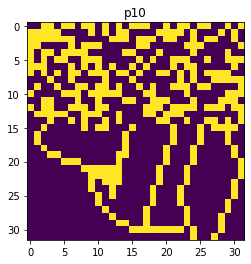

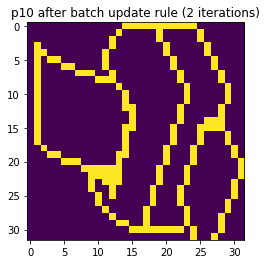

True


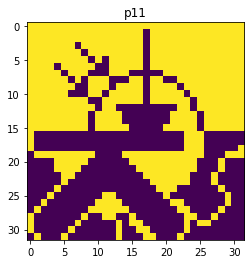

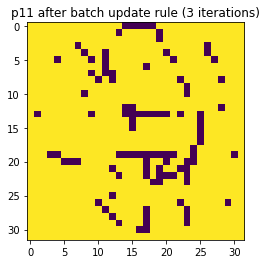

False
False


In [8]:
model.set_pattern(patterns[9])
target = patterns[0]
plot_image(model.pattern, "p10")
for i in range(1000):
    before = model.pattern.copy()
    model.update_rule()
    if (np.all(model.pattern == before)):
        break
plot_image(model.pattern, "p10 after batch update rule (" + str(i+1) + " iterations)")
print(np.all(model.pattern == target))

model.set_pattern(patterns[10])
plot_image(model.pattern, "p11")
for i in range(1000):
    before = model.pattern.copy()
    model.update_rule()
    if (np.all(model.pattern == before)):
        break
plot_image(model.pattern, "p11 after batch update rule (" + str(i+1) + " iterations)")
target = patterns[1]
print(np.all(model.pattern == target))
target = patterns[2]
print(np.all(model.pattern == target))

### Clearly convergence is practially instantaneous. What happens if we select units randomly? Please calculate their new state and then repeat the process in the spirit of the original sequential Hopfield dynamics. Please demonstrate the image every hundredth iteration or so.

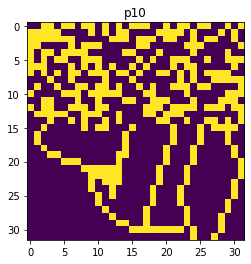

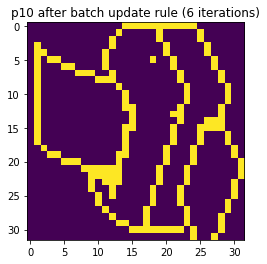

False


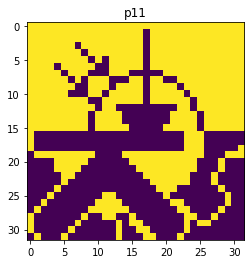

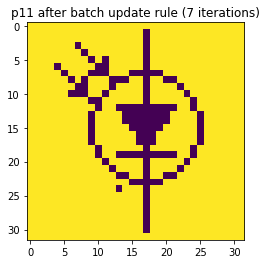

False
False


In [9]:
model.set_pattern(patterns[9])
target = patterns[0]
plot_image(model.pattern, "p10")
for i in range(10000):
    before = model.pattern.copy()
    model.update_rule_async()
    if (np.all(model.pattern == before)):
        break
plot_image(model.pattern, "p10 after batch update rule (" + str(i+1) + " iterations)")
print(np.all(model.pattern == target))

model.set_pattern(patterns[10])
target = patterns[2]
plot_image(model.pattern, "p11")
for i in range(10000):
    before = model.pattern.copy()
    model.update_rule_async()
    if (np.all(model.pattern == before)):
        break
plot_image(model.pattern, "p11 after batch update rule (" + str(i+1) + " iterations)")
target = patterns[1]
print(np.all(model.pattern == target))
target = patterns[2]
print(np.all(model.pattern == target))

## 3.3 - Energy

### What is the energy at the different attractors?

In [10]:
for i in range(3):
    model.set_pattern(patterns[i])
    print("Energy at attractor " + str(i+1) + " is " + str(model.energy()))

Energy at attractor 1 is -1473936
Energy at attractor 2 is -1398416
Energy at attractor 3 is -1497344


### What is the energy at the points of the distorted patterns?

In [11]:
for i in range(3,11):
    model.set_pattern(patterns[i])
    print("Energy at distorted pattern " + str(i+1) + " is " + str(model.energy()))

Energy at distorted pattern 4 is -737772
Energy at distorted pattern 5 is -538512
Energy at distorted pattern 6 is -699696
Energy at distorted pattern 7 is -702188
Energy at distorted pattern 8 is -175664
Energy at distorted pattern 9 is -273932
Energy at distorted pattern 10 is -425964
Energy at distorted pattern 11 is -177664


### Follow how the energy changes from iteration to iteration when you use the sequential update rule to approach an attractor.

True


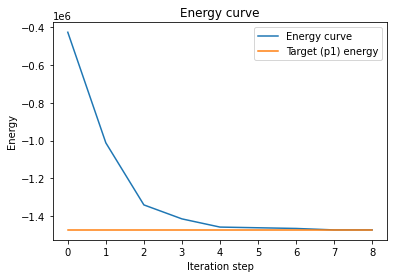

In [12]:
model.set_pattern(patterns[9])
target = patterns[0]
energies = []
for i in range(10000):
    energies += [model.energy()]
    before = model.pattern.copy()
    model.update_rule_async()
    if (np.all(model.pattern == before)):
        energies += [model.energy()]
        break
        
print(np.all(model.pattern == target))
plt.plot(range(len(energies)), energies, label="Energy curve")
model.set_pattern(target)
plt.plot(range(len(energies)), [model.energy() for i in range(len(energies))], label="Target (p1) energy")
plt.xlabel("Iteration step")
plt.ylabel("Energy")
plt.title("Energy curve")
plt.legend()
plt.show()

True


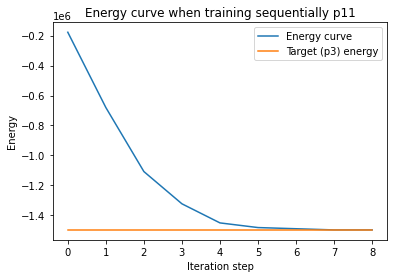

In [13]:
model.set_pattern(patterns[10])
target = patterns[2]
energies = []
for i in range(1000):
    energies += [model.energy()]
    before = model.pattern.copy()
    model.update_rule_async()
    if (np.all(model.pattern == before)):
        energies += [model.energy()]
        break
        
print(np.all(model.pattern == target))
plt.plot(range(len(energies)), energies, label="Energy curve")
model.set_pattern(target)
plt.plot(range(len(energies)), [model.energy() for i in range(len(energies))], label="Target (p3) energy")
plt.xlabel("Iteration step")
plt.ylabel("Energy")
plt.title("Energy curve when training sequentially p11")
plt.legend()
plt.show()

### Generate a weight matrix by setting the weights to normally distributed random numbers, and try iterating an arbitrary starting state. What happens?

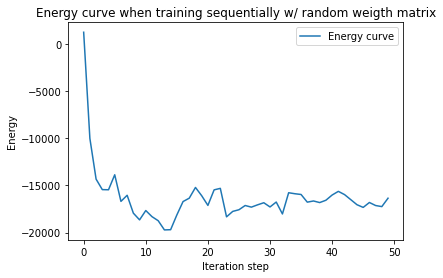

In [14]:
model.weights = np.random.normal(0, 1, (1024, 1024))

model.set_pattern(patterns[10])
energies = []
for i in range(50):
    energies += [model.energy()]
    before = model.pattern.copy()
    model.update_rule_async()
    if (np.all(model.pattern == before)):
        energies += [model.energy()]
        break

plt.plot(range(len(energies)), energies, label="Energy curve")
plt.xlabel("Iteration step")
plt.ylabel("Energy")
plt.title("Energy curve when training sequentially w/ random weigth matrix")
plt.legend()
plt.show()

### Make the weight matrix symmetric (e.g. by setting w=0.5*(w+w')). What happens now? Why?

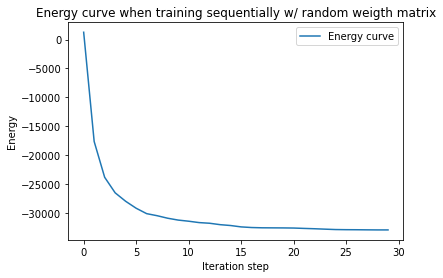

In [15]:
model.weights = 0.5 * (model.weights + model.weights.T)

model.set_pattern(patterns[10])
energies = []
for i in range(50):
    energies += [model.energy()]
    before = model.pattern.copy()
    model.update_rule_async()
    if (np.all(model.pattern == before)):
        energies += [model.energy()]
        break

plt.plot(range(len(energies)), energies, label="Energy curve")
plt.xlabel("Iteration step")
plt.ylabel("Energy")
plt.title("Energy curve when training sequentially w/ random weigth matrix")
plt.legend()
plt.show()

0.0
0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.2
0.21
0.22
0.23
0.24
0.25
0.26
0.27
0.28
0.29
0.3
0.31
0.32
0.33
0.34
0.35
0.36
0.37
0.38
0.39
0.4
0.41
0.42
0.43
0.44
0.45
0.46
0.47
0.48
0.49
0.5
0.51
0.52
0.53
0.54
0.55
0.56
0.57
0.58
0.59
0.6
0.61
0.62
0.63
0.64
0.65
0.66
0.67
0.68
0.69
0.7
0.71
0.72
0.73
0.74
0.75
0.76
0.77
0.78
0.79
0.8
0.81
0.82
0.83
0.84
0.85
0.86
0.87
0.88
0.89
0.9
0.91
0.92
0.93
0.94
0.95
0.96
0.97
0.98
0.99


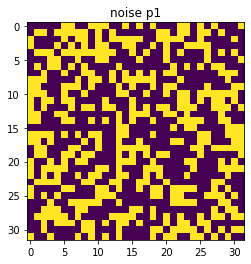

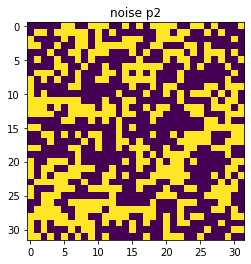

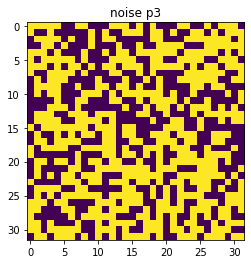

In [74]:
#Part 3.4 

import random 

model = HopfieldNetwork()

#noise = np.random.rand(1024)*noise

#testarr =np.array([1,1,1,1,1,1,1,1,1,1])

#Unclear definitions of noise??
#Add noise to the patterns 

#model.set_pattern(patterns[0])

targets = patterns[0:3,:]
model.learn_weights(targets)
itterations = []
allnoise = []

go = True

for i in range(1000):
    if go == False: 
        break 
    noiseL = i/1000
    if i%10 == 0:
        print(noiseL)
    #print(noiseL)
    noise = np.ones(1024)
    for j in range(i):
        indx = random.randint(0,1023)
        noise[indx] = noise[indx]*-1
    #print(np.multiply(testarr,noise))
    noisep1 = np.multiply(patterns[0],noise)
    noisep2 = np.multiply(patterns[1],noise)
    noisep3 = np.multiply(patterns[2],noise)
    
    model.set_pattern(noisep1)
    target = patterns[0]
    for i in range(10000):
        before = model.pattern.copy()
        model.update_rule_async()
        if (np.all(model.pattern == before)):
            if (np.all(model.pattern != target)):
                print("P1 Failed on noise ", noiseL)
                go = False
            break
            
    model.set_pattern(noisep2)
    target = patterns[1]
    for i in range(10000):
        before = model.pattern.copy()
        model.update_rule_async()
        if (np.all(model.pattern == before)):
            if (np.all(model.pattern != target)):
                print("P2 Failed on noise ", noiseL)
                go = False
            break
            
    model.set_pattern(noisep3)
    target = patterns[2]
    for i in range(10000):
        before = model.pattern.copy()
        model.update_rule_async()
        if (np.all(model.pattern == before)):
            if (np.all(model.pattern != target)):
                print("P3 Failed on noise ", noiseL)
                go = False
            break
            
plot_image(noisep1, "noise p1")
plot_image(noisep2, "noise p2")
plot_image(noisep3, "noise p3")
            


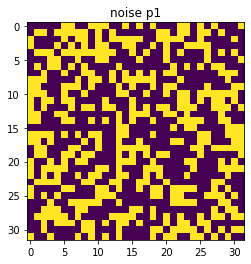

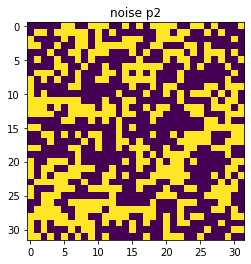

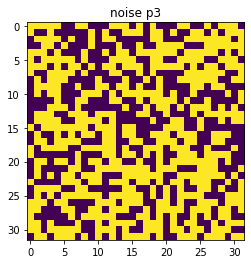

True 5


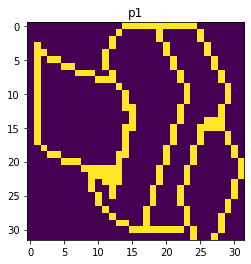

True 6


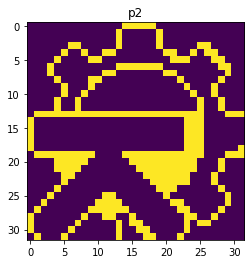

True 6


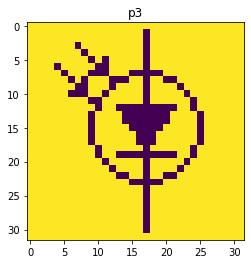

In [80]:
#check with 100% noise again

plot_image(noisep1, "noise p1")
plot_image(noisep2, "noise p2")
plot_image(noisep3, "noise p3")

model.set_pattern(noisep1)
target = patterns[0]
for i in range(10000):
    before = model.pattern.copy()
    model.update_rule_async()
    if (np.all(model.pattern == before)):
        if (np.all(model.pattern != target)):
            print("P1 Failed on noise ", noiseL)
        break
print(np.all(model.pattern == target), i)
plot_image(model.pattern, "p1")

model.set_pattern(noisep2)
target = patterns[1]
for i in range(10000):
    before = model.pattern.copy()
    model.update_rule_async()
    if (np.all(model.pattern == before)):
        if (np.all(model.pattern != target)):
            print("P2 Failed on noise ", noiseL)
        break
print(np.all(model.pattern == target), i)
plot_image(model.pattern, "p2")
      
model.set_pattern(noisep3)
target = patterns[2]
for i in range(10000):
    before = model.pattern.copy()
    model.update_rule_async()
    if (np.all(model.pattern == before)):
        if (np.all(model.pattern != target)):
            print("P3 Failed on noise ", noiseL)
        break
print(np.all(model.pattern == target),i)
plot_image(model.pattern, "p3")

0 ok
P0Failed on noise 
1
percentage of failed attempts 1.0
0 ok
P0Failed on noise 
1 ok
1
percentage of failed attempts 0.5
0 ok
P0Failed on noise 
1 ok
2 ok
1
percentage of failed attempts 0.3333333333333333
0 ok
P0Failed on noise 
1 ok
2 ok
P2Failed on noise 
3 ok
P3Failed on noise 
3
percentage of failed attempts 0.75
0 ok
P0Failed on noise 
1 ok
2 ok
3 ok
P3Failed on noise 
4 ok
P4Failed on noise 
3
percentage of failed attempts 0.6
0 ok
P0Failed on noise 
1 ok
2 ok
P2Failed on noise 
3 ok
P3Failed on noise 
4 ok
P4Failed on noise 
5 ok
P5Failed on noise 
5
percentage of failed attempts 0.8333333333333334
0 ok
P0Failed on noise 
1 ok
P1Failed on noise 
2 ok
P2Failed on noise 
3 ok
P3Failed on noise 
4 ok
P4Failed on noise 
5 ok
P5Failed on noise 
6 ok
P6Failed on noise 
7
percentage of failed attempts 1.0
0 ok
P0Failed on noise 
1 ok
P1Failed on noise 
2 ok
P2Failed on noise 
3 ok
P3Failed on noise 
4 ok
P4Failed on noise 
5 ok
P5Failed on noise 
6 ok
P6Failed on noise 
7 ok
P7Fai

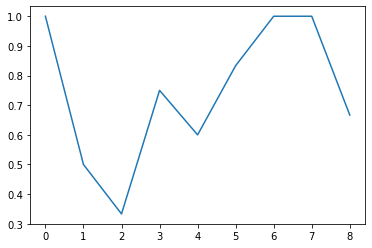

In [104]:
#70% noise 
failed = []
for n in range(1,10):
    noise = np.ones(1024)
    for j in range(600):
        indx = random.randint(0,1023)
        noise[indx] = noise[indx]*-1

    testPatterns = []
    numPattern = n
    for i in range(numPattern):
        testPatterns.append(np.multiply(patterns[i],noise))

    fail = 0
    targets = patterns[0:numPattern,:]
    for i,pattern in enumerate(testPatterns): 
        model.set_pattern(pattern)
        target = patterns[i]
        #plot_image(pattern, i)
        #plot_image(target, i)
        for j in range(10000):
            before = model.pattern.copy()
            model.update_rule_async()
            if (np.all(model.pattern == before)):
                print(i,"ok")
                #plot_image(model.pattern, "final"+str(i))
                if (np.all(model.pattern == target) == False):
                    print("P"+str(i)+"Failed on noise ")
                    fail += 1 
                break

    print(fail)
    print("percentage of failed attempts", fail/numPattern)
    failed.append(fail/numPattern)

plt.plot(failed)
    